<a href="https://colab.research.google.com/github/Sakshiajadhav/Covid-19-Data-analysis/blob/main/Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Covid cases in India.csv")
data.head()

,S. No.,Name of State / UT,Total Confirmed cases,Active,Cured/Discharged/Migrated,Deaths
0,1,Andhra Pradesh,1583,1062,488,33
1,2,Andaman and Nicobar Islands,33,1,32,0
2,3,Arunachal Pradesh,1,0,1,0
3,4,Assam,43,9,33,1
4,5,Bihar,517,396,117,4


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S. No.                     32 non-null     int64 
 1   Name of State / UT         32 non-null     object
 2   Total Confirmed cases      32 non-null     int64 
 3   Active                     32 non-null     int64 
 4   Cured/Discharged/Migrated  32 non-null     int64 
 5   Deaths                     32 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.6+ KB


In [3]:
data.rename(columns={'Name of State / UT':'States','Cured/Discharged/Migrated':'Discharged'},inplace=True)
data.columns

Index(['S. No.', 'States', 'Total Confirmed cases', 'Active', 'Discharged',
       'Deaths'],
      dtype='object')

In [4]:
data.isnull().sum()
x=data["Active"].mode()[0]
print(x)
data["Active"].fillna(x,inplace=True)
data.head(20)

1


,S. No.,States,Total Confirmed cases,Active,Discharged,Deaths
0,1,Andhra Pradesh,1583,1062,488,33
1,2,Andaman and Nicobar Islands,33,1,32,0
2,3,Arunachal Pradesh,1,0,1,0
3,4,Assam,43,9,33,1
4,5,Bihar,517,396,117,4
5,6,Chandigarh,97,77,19,1
6,7,Chhattisgarh,57,21,36,0
7,8,Delhi,4549,3123,1362,64
8,9,Goa,7,0,7,0
9,10,Gujarat,5428,4096,1042,290


In [5]:
data.isnull().sum()

S. No.                   0
States                   0
Total Confirmed cases    0
Active                   0
Discharged               0
Deaths                   0
dtype: int64

In [6]:
print(data)

    S. No.                       States  Total Confirmed cases  Active  \
0        1               Andhra Pradesh                   1583    1062   
1        2  Andaman and Nicobar Islands                     33       1   
2        3            Arunachal Pradesh                      1       0   
3        4                        Assam                     43       9   
4        5                        Bihar                    517     396   
5        6                   Chandigarh                     97      77   
6        7                 Chhattisgarh                     57      21   
7        8                        Delhi                   4549    3123   
8        9                          Goa                      7       0   
9       10                      Gujarat                   5428    4096   
10      11                      Haryana                    442     192   
11      12             Himachal Pradesh                     40       1   
12      13            Jammu and Kashmi

In [7]:
data['%cured'] = (data['Discharged']/data['Total Confirmed cases'])*100
data['%Deaths']=(data['Deaths']/data['Total Confirmed cases'])*100
data['%Active']=(data['Active']/data['Total Confirmed cases'])*100
#print(data['%cured'])
#print(data['%Deaths'])
df_latest = data.sort_values(by=['%cured'], ascending = False)
df_latest.head(10)

,S. No.,States,Total Confirmed cases,Active,Discharged,Deaths,%cured,%Deaths,%Active
2,3,Arunachal Pradesh,1,0,1,0,100.000000,0.000000,0.000000
8,9,Goa,7,0,7,0,100.000000,0.000000,0.000000
19,20,Manipur,2,0,2,0,100.000000,0.000000,0.000000
1,2,Andaman and Nicobar Islands,33,1,32,0,96.969697,0.000000,3.030303
11,12,Himachal Pradesh,40,1,34,2,85.000000,5.000000,2.500000
20,21,Meghalaya,12,1,10,1,83.333333,8.333333,8.333333
15,16,Kerala,500,95,401,4,80.200000,0.800000,19.000000
3,4,Assam,43,9,33,1,76.744186,2.325581,20.930233
29,30,Uttarakhand,60,20,39,1,65.000000,1.666667,33.333333
6,7,Chhattisgarh,57,21,36,0,63.157895,0.000000,36.842105


In [8]:
print("The total no of deaths:",df_latest['Deaths'].sum())
print("The total no of cured:",df_latest['Discharged'].sum())

The total no of deaths: 1391
The total no of cured: 11775


In [9]:
df2= df_latest.copy()

df_Top= df2.head(10)

df_Top.style.background_gradient(cmap='Reds')

,S. No.,States,Total Confirmed cases,Active,Discharged,Deaths,%cured,%Deaths,%Active
2,3,Arunachal Pradesh,1,0,1,0,100.000000,0.000000,0.000000
8,9,Goa,7,0,7,0,100.000000,0.000000,0.000000
19,20,Manipur,2,0,2,0,100.000000,0.000000,0.000000
1,2,Andaman and Nicobar Islands,33,1,32,0,96.969697,0.000000,3.030303
11,12,Himachal Pradesh,40,1,34,2,85.000000,5.000000,2.500000
20,21,Meghalaya,12,1,10,1,83.333333,8.333333,8.333333
15,16,Kerala,500,95,401,4,80.200000,0.800000,19.000000
3,4,Assam,43,9,33,1,76.744186,2.325581,20.930233
29,30,Uttarakhand,60,20,39,1,65.000000,1.666667,33.333333
6,7,Chhattisgarh,57,21,36,0,63.157895,0.000000,36.842105


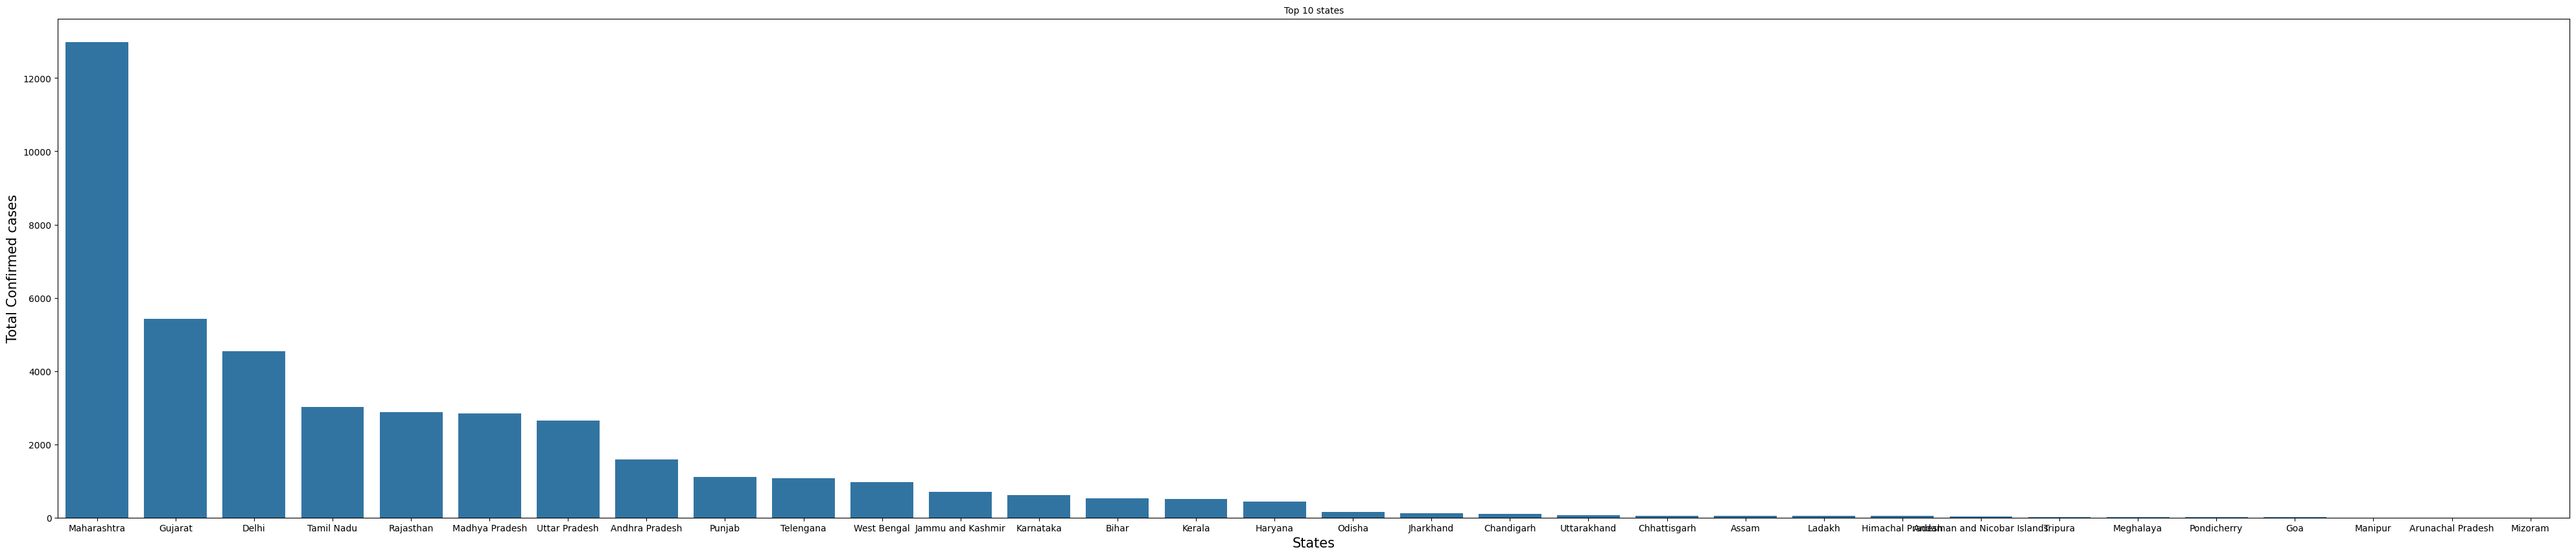

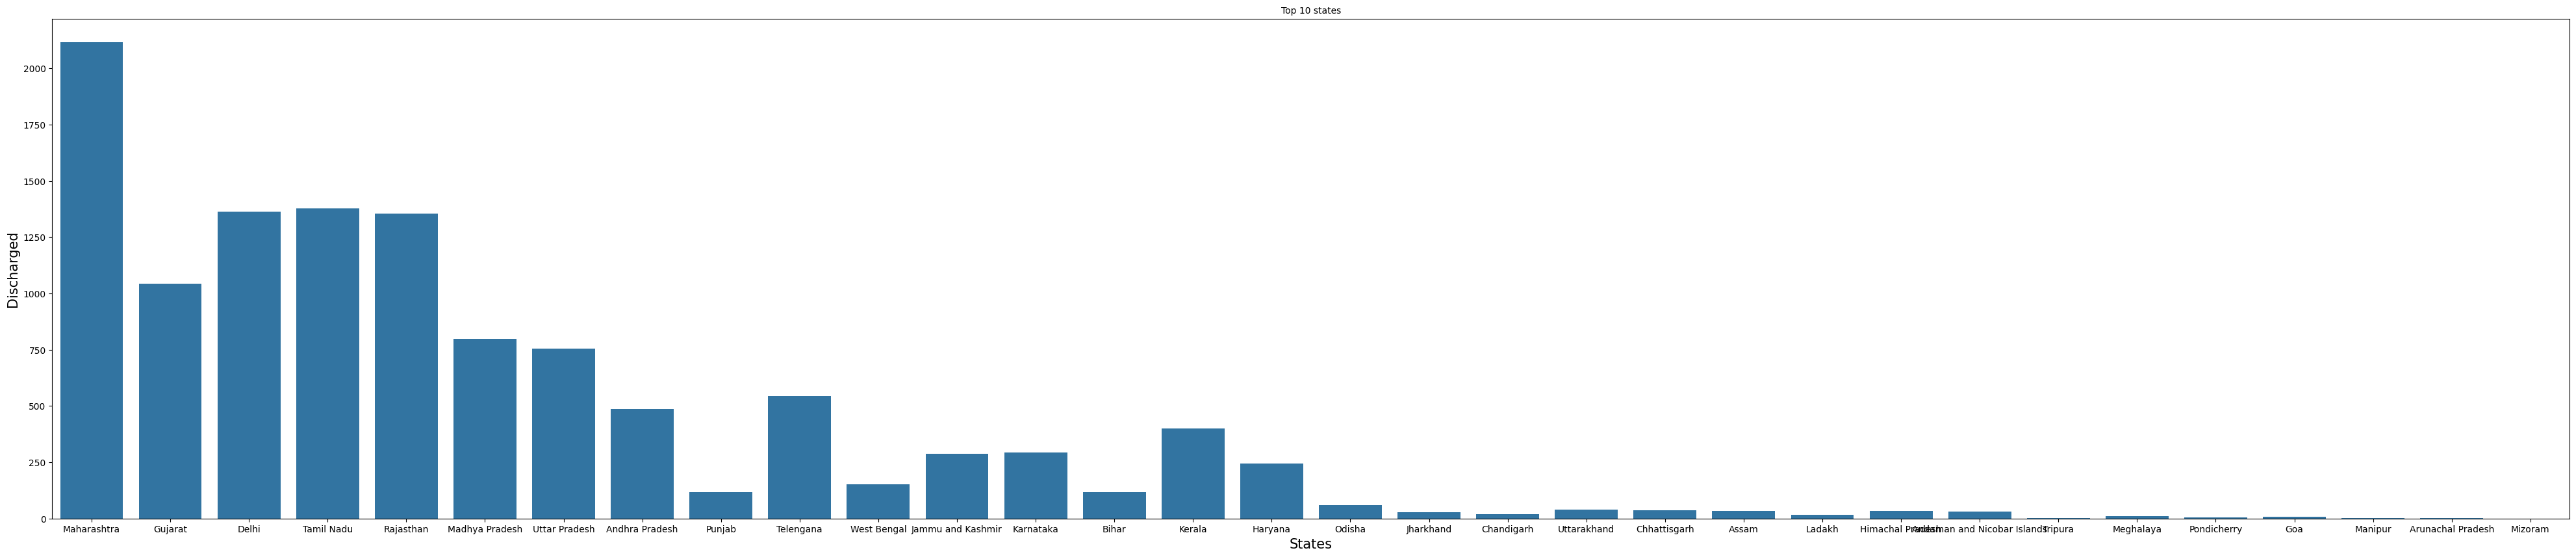

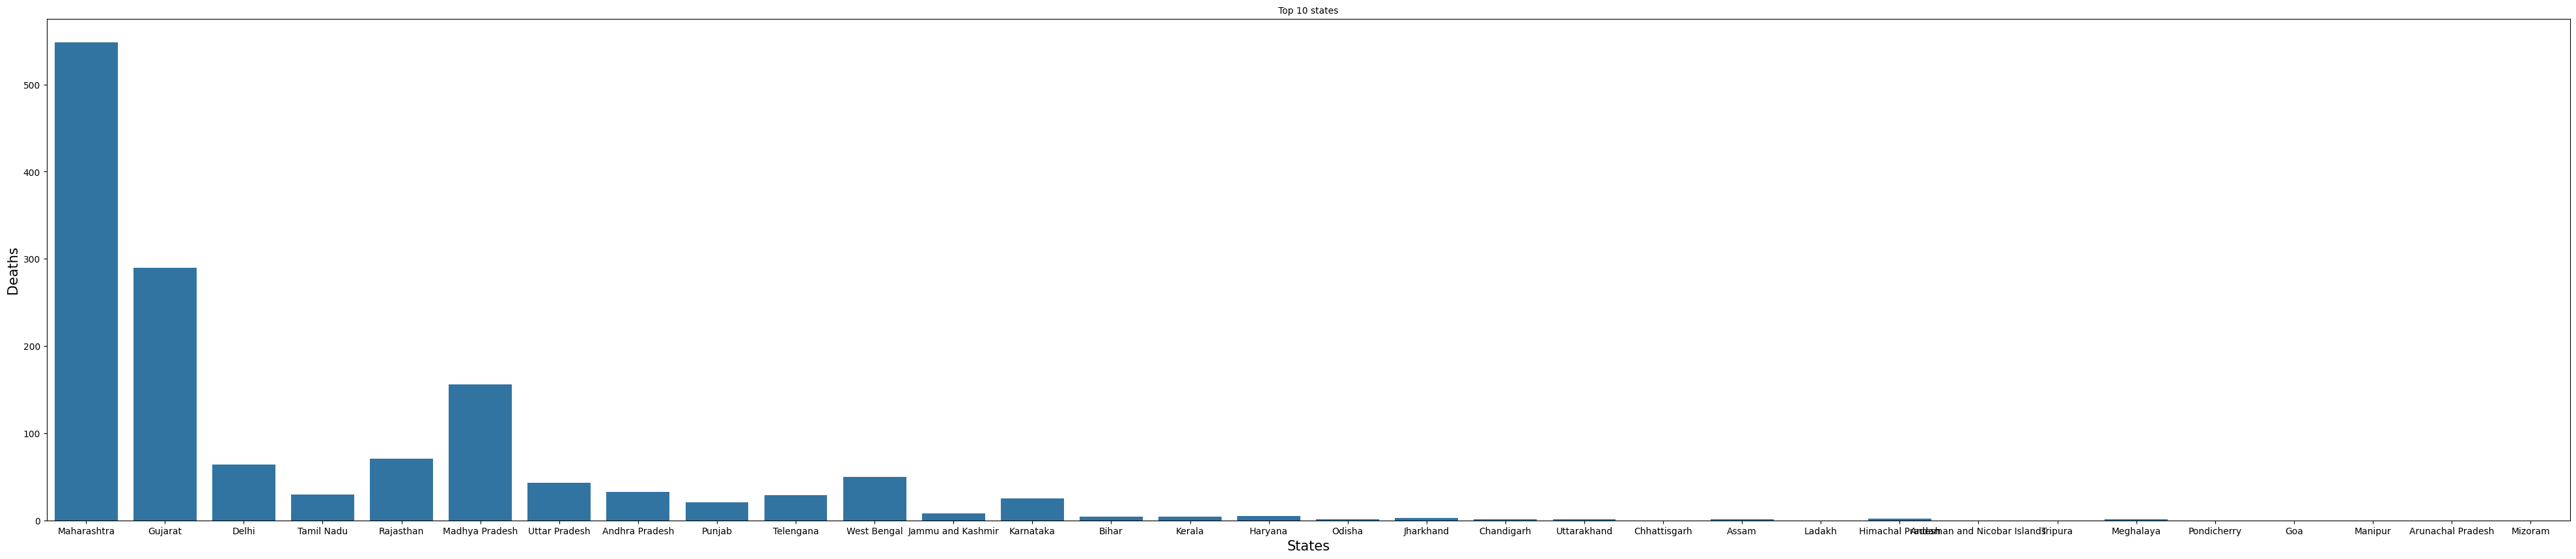

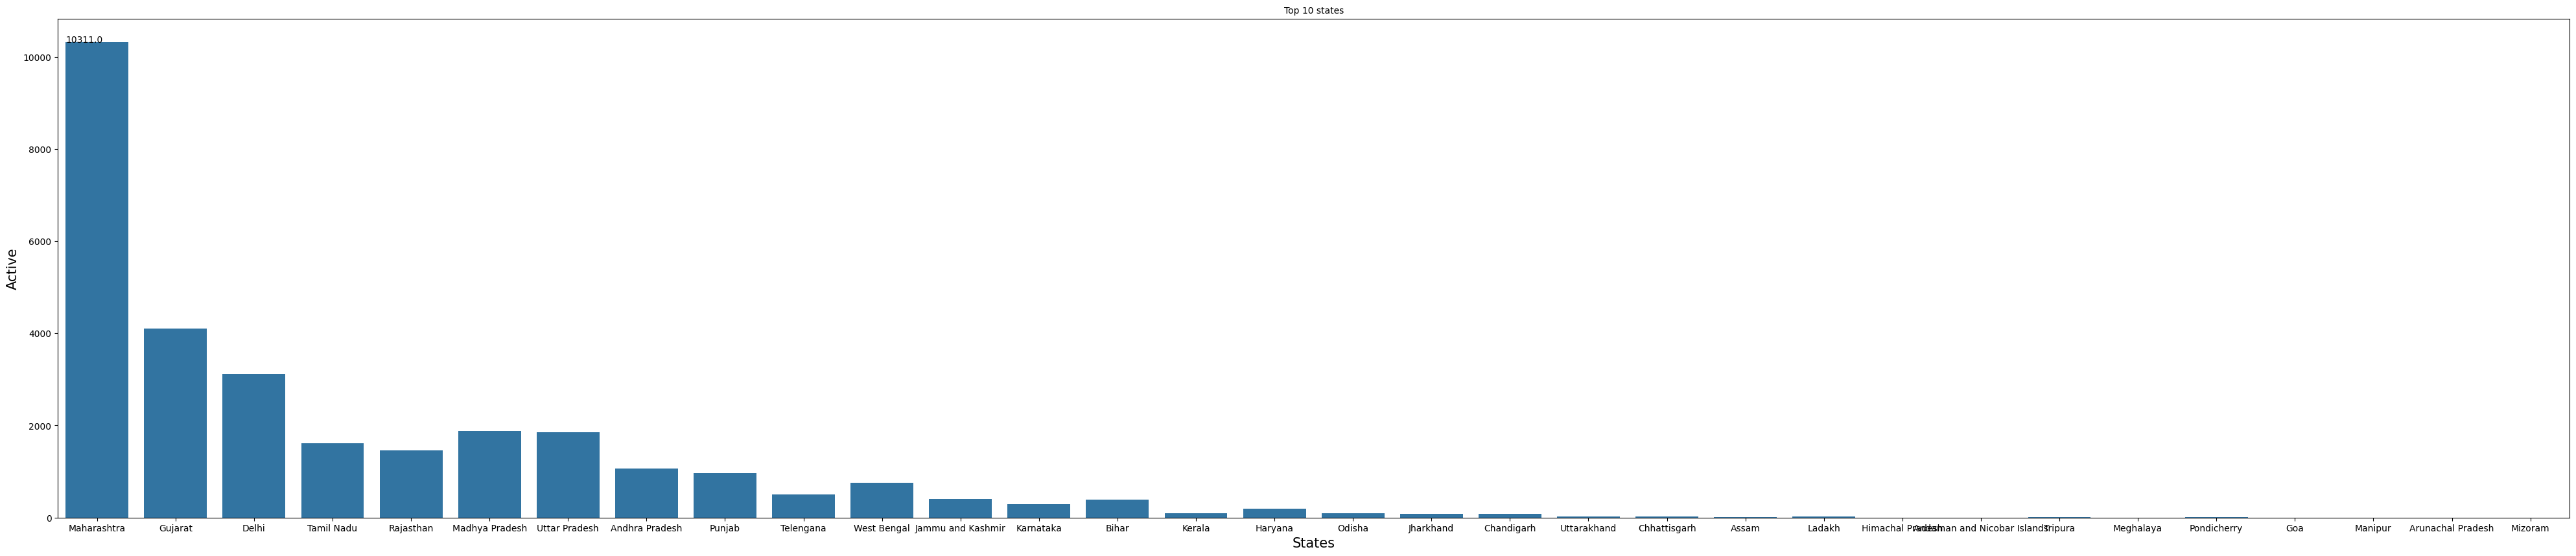

In [10]:
df2 = df_latest.sort_values(by=['Total Confirmed cases'], ascending = False)
for feature in df2[['Total Confirmed cases','Discharged','Deaths','Active']]:
  fig=plt.figure(figsize=(50,10))
  plt.title("Top 10 states", size=10)
  ax=sns.barplot(data=df2,y= df2[feature],x='States', linewidth=0, edgecolor='black')
  plt.xlabel('States', size = 15)
  plt.ylabel(feature, size = 15)

for i in ax.patches:
  ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
  plt.show()

In [11]:
vacc = pd.read_csv("COVID-19 India Statewise Vaccine Data.csv")
vacc.head(15)

,State/UTs,Total Vaccination Doses,Dose 1,Dose 2,Population
0,Andaman and Nicobar,624118,311046,313072,399001
1,Andhra Pradesh,84043879,40596914,43446965,91702478
2,Arunachal Pradesh,1576467,851479,724988,1711947
3,Assam,42130902,22470609,19660293,35998752
4,Bihar,116997161,62060111,54937050,128500364
5,Chandigarh,1989833,1086102,903731,1158040
6,Chhattisgarh,35836458,18693176,17143282,32199722
7,Dadra and Nagar Haveli and Daman and Diu,1313783,727305,586478,773997
8,Delhi,30381117,16492260,13888857,19301096
9,Goa,2558857,1349270,1209587,1521992


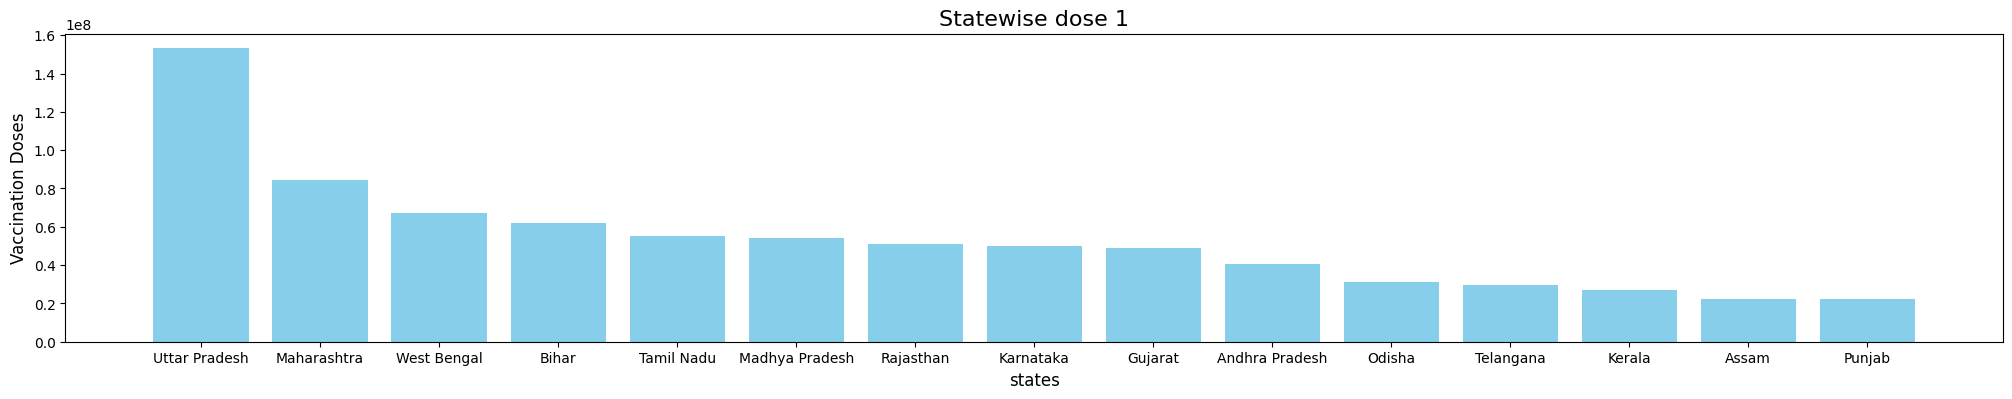

In [12]:
vacc_new = vacc.sort_values(by=['Dose 1'], ascending = False)
plt.figure(figsize=(25,4))
plt.bar(vacc_new['State/UTs'][:15], vacc_new['Dose 1'][:15],align='center',color='skyblue')
plt.xlabel('states', size = 12)
plt.ylabel('Vaccination Doses', size = 12)
plt.title('Statewise dose 1', size = 16)
plt.show()

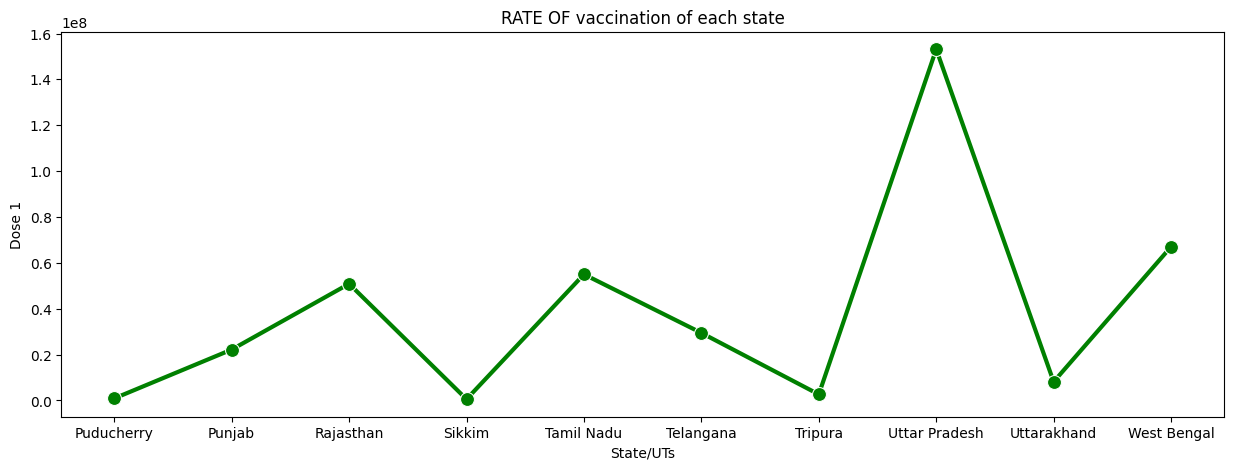

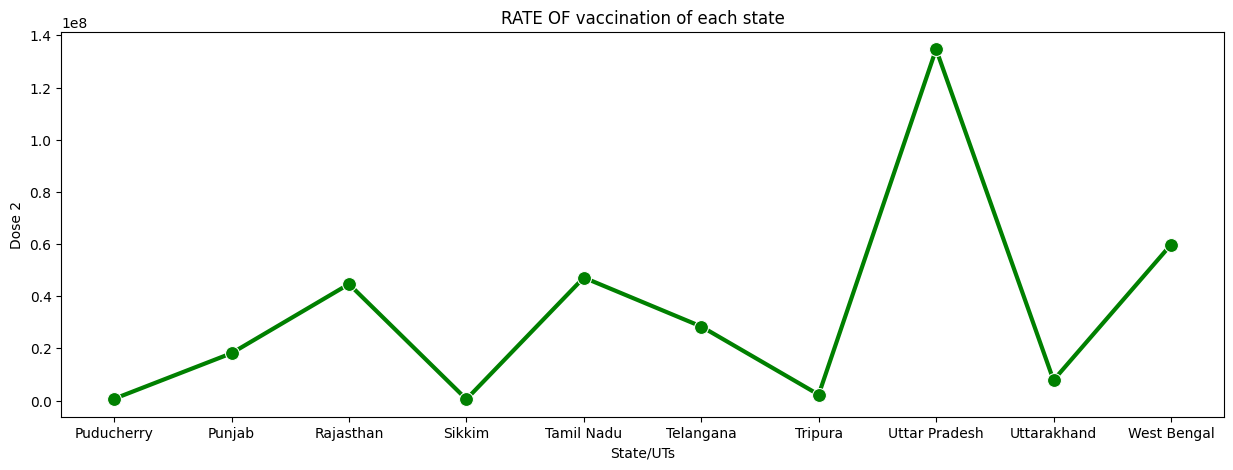

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x="State/UTs",y="Dose 1",data=vacc.tail(10),color="g",lw=3,marker='o',markersize=10)
plt.title('RATE OF vaccination of each state')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x="State/UTs",y="Dose 2",data=vacc.tail(10),color="g",lw=3,marker='o',markersize=10)
plt.title('RATE OF vaccination of each state')
plt.show()

In [14]:
vacc.columns

Index(['State/UTs', 'Total Vaccination Doses', 'Dose 1', 'Dose 2',
       'Population'],
      dtype='object')